In [2]:
%pylab inline
import classes, cycles
parameters = classes.Empty()
start_position = classes.PosAndTime()

Populating the interactive namespace from numpy and matplotlib


In [80]:
parameters.lmbda = 1
parameters.velocity = 1

start_guide_cosines = classes.GuideCosines(a=0, b=0, c=0)

time_limit = 10000

In [81]:
one_particle_path = cycles.simulate_one_particle(parameters, start_position, start_guide_cosines, time_limit)

distances = list(map(lambda obj : obj.distance(), one_particle_path))
times = list(map(lambda obj : obj.t, one_particle_path))

In [82]:
D = 1/3 * parameters.lmbda * parameters.velocity
def theory(t):
    return (6 * D * t)**0.5
predictions = list(map(theory, times))

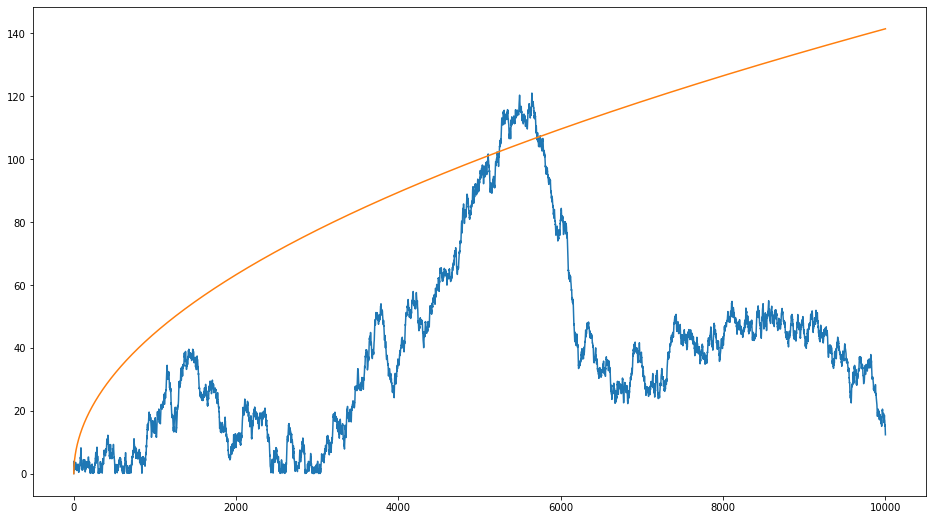

In [83]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(times, distances, times, predictions)